In [102]:
import pyvis as pv
import networkx as nx
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_cytoscape as cyto
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import random as rd
import numpy as np
from matplotlib.pyplot import figure

In [69]:
# Importando as áreas
raw_data = pd.read_csv("c:/Users/Usuario/Documents/Estudos/Data Science e Programação/Datasets/colaboradores.csv")
raw_data = raw_data[['nome', 'area']]

In [51]:
# Criando uma lista de quantidade de pessoas por área
areas = set(raw_data['area'])

In [52]:
# Criando uma função para encontrar a estimativa do número de conecções 
def total_conections(name):
    area = list(raw_data.loc[raw_data['nome'] == name]['area'])[0]
    total = len(raw_data.loc[raw_data['area'] == area])
    conections = rd.randint(round(total*0.1), round(total*1.5))
    return conections

In [81]:
# Criando uma função para atribuir a ponderação de cada nome
def weight_definition(name):
    # Encontrando a área
    areas_dict = dict.fromkeys(areas, 1) 
    area = list(raw_data.loc[raw_data['nome'] == name]['area'])[0]
    # Atribuindo o peso adequado
    areas_dict[area] = 100
    raw_data['probabilidade'] = raw_data.apply(lambda x: areas_dict[x['area']], axis = 1)
    # Criando o vetor de itens e pesos
    itens = list(raw_data['nome'])
    probability = list(raw_data['probabilidade'])
    weights = [j/sum(probability) for j in probability]
    return itens, weights

In [83]:
# Criando uma função para criar a lista de conecções de cada pessoa
def ona_conections(name):
    # Lista completa de nomes
    total_names = list(raw_data['nome'])
    total_names.remove(i)
    # Total de conecções
    conections = total_conections(i)
    # Definição da lista de nomes e pesos
    names_list = weight_definition(name)[0]
    weights_list = weight_definition(name)[1]
    # Criação da lista de coneções
    conections_list = np.random.choice(a = names_list, size = conections, p = weights_list)
    return conections_list  

In [85]:
# Criando uma função para gerar a rede de cada nome
def ona_generator(name):
    conections_list = ona_conections(name)
    ona_list = [(name, i) for i in conections_list]
    return ona_list

In [86]:
ona_total_list = []
for i in list(raw_data['nome']):
    ona_total_list.extend(ona_generator(i))

In [93]:
dataset = pd.DataFrame(ona_total_list, columns = ['partida', 'chegada'])
dataset

,partida,chegada
0,Latasha Whitt,Rose Barnes
1,Latasha Whitt,Carolyn Amoa
2,Latasha Whitt,Stephen Mcbroom
3,Latasha Whitt,Patricia Paynter
4,Latasha Whitt,Leatrice Haddix
...,...,...
123807,Kelly Neilson,Wilma Frost
123808,Kelly Neilson,Maria Ryan
123809,Kelly Neilson,Carlyn Emerick
123810,Kelly Neilson,Ruby Harris


In [94]:
G = nx.DiGraph()

In [95]:
G = nx.from_pandas_edgelist(dataset, 'partida', 'chegada')

NetworkXError: random_state_index is incorrect

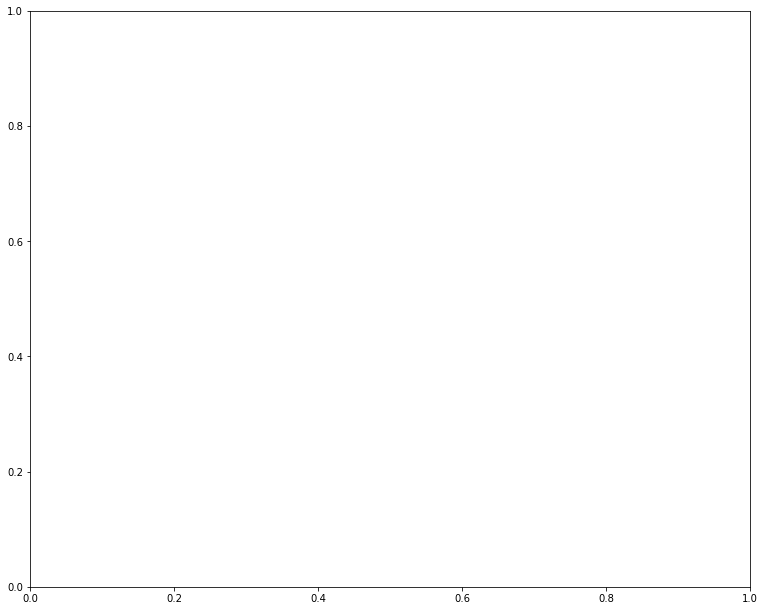

In [103]:
figure(figsize=(10, 8))
nx.draw(G)